In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [15]:
class LinearDataGenerator:
    def __init__(self, slope, intercept):
        self.slope = slope
        self.intercept = intercept
    
    def sample(self, num_samples: int, indep_var_range: Tuple[float, float]=(0, 1)):
        assert type(num_samples) is int
        assert num_samples > 0
        assert indep_var_range[1] > indep_var_range[0]
        
        range = indep_var_range[1] - indep_var_range[0]
        x = np.random.sample((num_samples, )) * range + indep_var_range[0]
        return x, x * self.slope + self.intercept

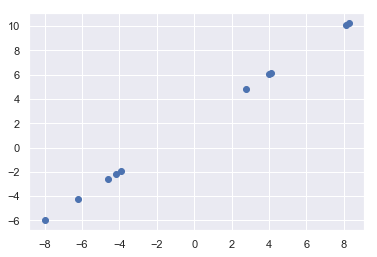

In [16]:
data_gen = LinearDataGenerator(1, 2)
x, y = data_gen.sample(10, (-10, 10))
plt.scatter(x, y)
plt.show()

In [54]:
class ClusterDataGenerator:
    def __init__(self, cluster_centers, cluster_spreads):
        self.centers = cluster_centers
        self.spreads = cluster_spreads
        self.num_clusters = len(cluster_centers)
        
    def sample(self, num_samples):
        samples = []
        labels = []
        l = 0
        for center, spread in zip(self.centers, self.spreads):
            num_cluster_samples = (int(num_samples / self.num_clusters), len(center))
            labels.extend([l] * num_cluster_samples[0])
            s = np.random.normal(center, spread, num_cluster_samples)
            samples.extend(list(s))
            l += 1
            
        return np.asarray(samples), np.asarray(labels)

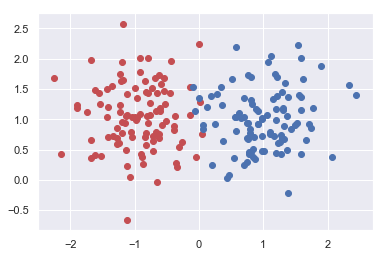

In [55]:
data_gen = ClusterDataGenerator(((-1, 1), (1, 1)), (0.5, 0.5))
samples, labels = data_gen.sample(200)

plt.scatter(samples[labels == 0, 0], samples[labels == 0, 1], c='r')
plt.scatter(samples[labels == 1, 0], samples[labels == 1, 1], c='b')
plt.show()